## Exploring the simplified year predictions dataset

Thus far, we've observed that our neural net is only classifying a single class. We hypothesize that this might have to do with the dataset being heavily biased towards a particular handful of classes. This might give us some insight into how we can properly modify our network.

In [4]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

Getting the labels and examples from the csv file

In [6]:
labels = []
examples = []

# Replace filename with the path to the CSV where you have the year predictions data saved.
filename = "/home/juice100/PycharmProjects/Cyanite/YearPredictionMSD.txt"
with open(filename, 'r') as f:
    for line in f:
        content = line.split(",")
        
        labels.append(int(content[0]))

        content.pop(0)

        content = [float(elem) for elem in content]

        # If we want a list of numpy arrays, not necessary
        #npa = np.asarray(content, dtype=np.float64)

        examples.append(content)

In [7]:
total_array = np.array(examples)

In [8]:
total_array

array([[ 4.994357e+01,  2.147114e+01,  7.307750e+01, ..., -1.822230e+00,
        -2.746348e+01,  2.263270e+00],
       [ 4.873215e+01,  1.842930e+01,  7.032679e+01, ...,  1.204941e+01,
         5.843453e+01,  2.692061e+01],
       [ 5.095714e+01,  3.185602e+01,  5.581851e+01, ..., -5.859000e-02,
         3.967068e+01, -6.634500e-01],
       ...,
       [ 4.512852e+01,  1.265758e+01, -3.872018e+01, ..., -6.071710e+00,
         5.396319e+01, -8.093640e+00],
       [ 4.416614e+01,  3.238368e+01, -3.349710e+00, ...,  2.032240e+01,
         1.483107e+01,  3.974909e+01],
       [ 5.185726e+01,  5.911655e+01,  2.639436e+01, ..., -5.515120e+00,
         3.235602e+01,  1.217352e+01]])

In [9]:
total_labels = np.array(labels)

In [10]:
total_labels

array([2001, 2001, 2001, ..., 2006, 2006, 2005])

In [11]:
training_examples = total_array[:10000]

In [12]:
training_labels = total_labels[:10000]

Observing the distribution of classes in the the training labels. Heavily biased towards late 90's/early 2000s, but it isn't entirely skewed. Neural net should still perform well. Maybe we should use random samples as opposed to the first 10000?

(array([  3.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,
          1.,   1.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   6.,   0.,   0.,   8.,   0.,   3.,  21.,   1.,   7.,
         27.,  26.,  46.,  21.,  18.,  27.,  56.,  30.,  76.,  44.,  48.,
         35.,  54.,  38.,  18.,  55.,  46.,  59.,  48.,  62.,  15.,  44.,
         40.,  86., 122., 140., 115., 146., 159., 263., 230., 318., 228.,
        313., 348., 385., 369., 456., 507., 535., 795., 711., 717., 774.,
        738., 548.]),
 array([1930.        , 1931.01265823, 1932.02531646, 1933.03797468,
        1934.05063291, 1935.06329114, 1936.07594937, 1937.08860759,
        1938.10126582, 1939.11392405, 1940.12658228, 1941.13924051,
        1942.15189873, 1943.16455696, 1944.17721519, 1945.18987342,
        1946.20253165, 1947.21518987, 1948.2278481 , 1949.24050633,
        1950.25316456, 1951.26582278, 1952.27848101, 1953.29113924,
        1954.30379747, 1955.3164557 , 1956.32911392,

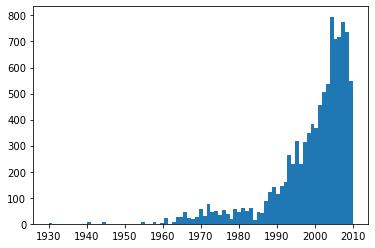

In [13]:
plt.hist(training_labels, bins='auto')

In [14]:
plt.show()

In [15]:
training_labels.shape

(10000,)

The histogram tells us that the first 10,000 training examples heavily favor music from the early 2000s.

(array([  3.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   5.,   0.,   1.,   1.,   0.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,
          0.,   0.,   8.,   0.,   3.,  21.,   0.,   1.,   7.,  27.,  26.,
          0.,  46.,  21.,  18.,  27.,   0.,  56.,  30.,  76.,  44.,   0.,
         48.,  35.,  54.,  38.,   0.,  18.,  55.,  46.,  59.,   0.,  48.,
         62.,  15.,  44.,   0.,  40.,  86., 122., 140.,   0., 115., 146.,
        159., 263.,   0., 230., 318., 228., 313.,   0., 348., 385., 369.,
        456.,   0., 507., 535., 795., 711.,   0., 717., 774., 738., 450.,
         98.]),
 array([1930. , 1930.8, 1931.6, 1932.4, 1933.2, 1934. , 1934.8, 1935.6,
        1936.4, 1937.2, 1938. , 1938.8, 1939.6, 1940.4, 1941.2, 1942. ,
        1942.8, 1943.6, 1944.4, 1945.2, 1946. , 1946.8, 1947.6, 1948.4,
        1949.2, 1950. , 1950.8, 1951.6, 1952.4, 1953.2, 1954. , 1954.8,
        1955.6, 1956.4, 1957.2

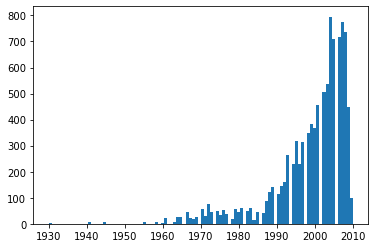

In [16]:
plt.hist(training_labels, bins=100)

The overall training set is also heavily biased towards music from the early the late 90s and early 2000s.

(array([6.0000e+00, 0.0000e+00, 5.0000e+00, 7.0000e+00, 1.9000e+01,
        4.2000e+01, 5.2000e+01, 9.3000e+01, 4.0000e+01, 0.0000e+00,
        3.5000e+01, 1.1000e+01, 6.0000e+00, 2.9000e+01, 2.4000e+01,
        2.5000e+01, 2.8000e+01, 1.9000e+01, 0.0000e+00, 3.5000e+01,
        5.2000e+01, 3.2000e+01, 2.4000e+01, 1.4000e+01, 1.5000e+01,
        3.0000e+01, 2.9000e+01, 0.0000e+00, 5.7000e+01, 4.3000e+01,
        6.0000e+01, 8.3000e+01, 7.4000e+01, 7.7000e+01, 1.3300e+02,
        1.2300e+02, 0.0000e+00, 2.7500e+02, 5.6500e+02, 5.9700e+02,
        5.8300e+02, 5.9200e+02, 4.2400e+02, 5.7100e+02, 6.0500e+02,
        0.0000e+00, 9.0200e+02, 9.4500e+02, 1.1200e+03, 1.3770e+03,
        1.7180e+03, 1.8670e+03, 2.2100e+03, 2.3490e+03, 0.0000e+00,
        2.1310e+03, 2.2880e+03, 2.5960e+03, 2.1840e+03, 2.4820e+03,
        2.1790e+03, 2.5020e+03, 2.9260e+03, 0.0000e+00, 3.1080e+03,
        3.1010e+03, 3.1620e+03, 3.5970e+03, 3.3860e+03, 3.3680e+03,
        3.5780e+03, 4.2190e+03, 0.0000e+00, 5.12

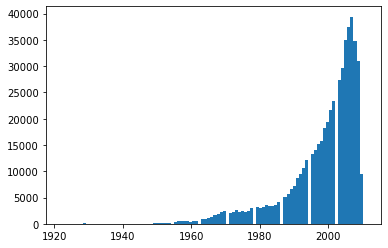

In [17]:
plt.hist(total_labels, bins=100)

Getting test examples from the bottom 1000 array elements

In [18]:
test_examples = total_array[-1000:]
test_labels = total_labels[-1000:]

Train and fit the classifier

In [19]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

clf.fit(training_examples, training_labels)   

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100, 100, 100),
              random_state=1, solver='sgd')

In [20]:
y_pred = clf.predict(test_examples)

Observing the predictions: 2004 is the only represnted example...

(array([999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2004.  , 2004.04, 2004.08, 2004.12, 2004.16, 2004.2 , 2004.24,
        2004.28, 2004.32, 2004.36, 2004.4 , 2004.44, 2004.48, 2004.52,
        2004.56, 2004.6 , 2004.64, 2004.68, 2004.72, 2004.76, 2004.8 ,
        2004.84, 2004.88, 2004.92, 2004.96, 2005.  , 2005.04, 2005.08,
        2005.12, 2005.16, 2005.2 ,

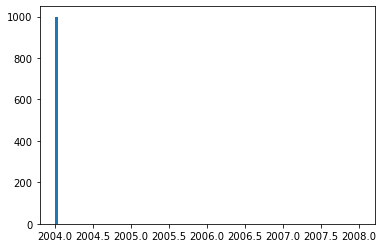

In [21]:
plt.hist(y_pred, bins=100)

Let's compare this to the actual distribution of the test labels. There is still a bias towards what looks like 2004, but overall, there is a distribution here.

(array([  2.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,
          0.,  31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   3.,   1.,   0.,   0.,   0.,   1.,   3.,   6.,   0.,
          0.,   5.,   4.,   0.,   2.,   0.,  11.,   0.,   3.,   1.,   0.,
          0.,   0.,   0.,   2.,   0.,   2.,   0.,   6.,   9.,   0.,  30.,
          0.,  14.,   0.,   0.,   7.,   7.,  19.,   9.,   0.,  20.,  24.,
         33.,   6.,   0.,  14.,  16.,  28.,  35.,   0.,  49.,  25.,  41.,
         56.,   0.,   1.,  78.,  75.,  40.,   0., 116.,  64.,  36.,  41.,
         15.]),
 array([1930. , 1930.8, 1931.6, 1932.4, 1933.2, 1934. , 1934.8, 1935.6,
        1936.4, 1937.2, 1938. , 1938.8, 1939.6, 1940.4, 1941.2, 1942. ,
        1942.8, 1943.6, 1944.4, 1945.2, 1946. , 1946.8, 1947.6, 1948.4,
        1949.2, 1950. , 1950.8, 1951.6, 1952.4, 1953.2, 1954. , 1954.8,
        1955.6, 1956.4, 1957.2

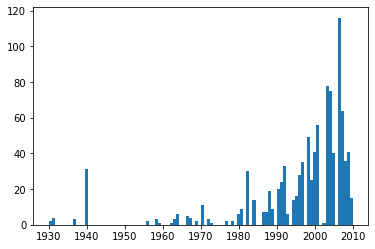

In [22]:
plt.hist(test_labels, bins=100)

Observing the training labels, there is more of a distribution than in the predicted labels. What could be causing the network to skew towards a particular class even though it is being trained on a decent distribution? 

(array([  3.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   5.,   1.,   1.,   0.,   6.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,
          8.,   0.,   3.,  21.,   0.,   1.,   7.,  27.,  26.,  46.,  21.,
          0.,  18.,  27.,  56.,  30.,  76.,   0.,  44.,  48.,  35.,  54.,
         38.,   0.,  18.,  55.,  46.,  59.,  48.,  62.,   0.,  15.,  44.,
         40.,  86., 122.,   0., 140., 115., 146., 159., 263.,   0., 230.,
        318., 228., 313., 348., 385.,   0., 369., 456., 507., 535., 795.,
          0., 711., 717., 774., 738., 450.,  98.]),
 array([1930.        , 1930.84210526, 1931.68421053, 1932.52631579,
        1933.36842105, 1934.21052632, 1935.05263158, 1935.89473684,
        1936.73684211, 1937.57894737, 1938.42105263, 1939.26315789,
        1940.10526316, 1940.94736842, 1941.78947368, 1942.63157895,
        1943.47368421, 1944.31578947, 1945.15789474, 1946.        ,
        1946.842

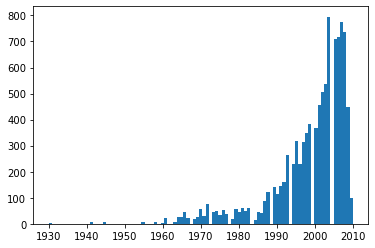

In [23]:
plt.hist(training_labels, bins=95)

Alpha is the regularization parameter... how about a large alpha, like 10?

In [24]:
clf = MLPClassifier(solver='sgd', alpha=10,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

clf.fit(training_examples, training_labels)                         


/home/juice100/miniconda3/envs/Cyanite/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=10, hidden_layer_sizes=(100, 100, 100, 100), random_state=1,
              solver='sgd')

In [25]:
y_pred = clf.predict(test_examples)

More of the same. A class in the 2000s is still being selected for more than anything else.

(array([436.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 564.]),
 array([2004.        , 2004.03157895, 2004.06315789, 2004.09473684,
        2004.12631579, 2004.15789474, 2004.18947368, 2004.22105263,
        2004.25263158, 2004.28421053, 2004.31578947, 2004.34736842,
        2004.37894737, 2004.41052632, 2004.44210526, 2004.47368421,
        2004.50526316, 2004.53684211, 2004.56842105, 2004.6       ,
        2004.631

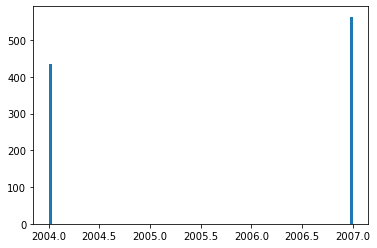

In [26]:
plt.hist(y_pred, bins=95)

How about a small alpha-- alpha = 0.0001

In [27]:
clf = MLPClassifier(solver='sgd', alpha=0.0001,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

clf.fit(training_examples, training_labels)     

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), random_state=1,
              solver='sgd')

In [28]:
y_pred = clf.predict(test_examples)

(array([999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2004.        , 2004.04210526, 2004.08421053, 2004.12631579,
        2004.16842105, 2004.21052632, 2004.25263158, 2004.29473684,
        2004.33684211, 2004.37894737, 2004.42105263, 2004.46315789,
        2004.50526316, 2004.54736842, 2004.58947368, 2004.63157895,
        2004.67368421, 2004.71578947, 2004.75789474, 2004.8       ,
        2004.842

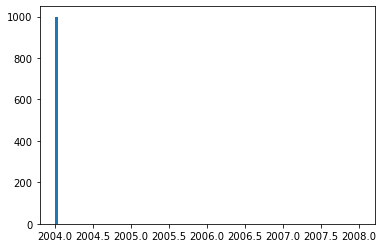

In [29]:
plt.hist(y_pred, bins = 95)

Let's increase the number of training examples to 100,000.

In [30]:
training_examples = total_array[:100000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:100000]

In [31]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

clf.fit(training_examples, training_labels)  

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100, 100, 100),
              random_state=1, solver='sgd')

In [32]:
y_pred = clf.predict(test_examples)

No improvement. Still favoring a single class.

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([2006.5       , 2006.51052632, 2006.52105263, 2006.53157895,
        2006.54210526, 2006.55263158, 2006.56315789, 2006.57368421,
        2006.58421053, 2006.59473684, 2006.60526316, 2006.61578947,
        2006.62631579, 2006.63684211, 200

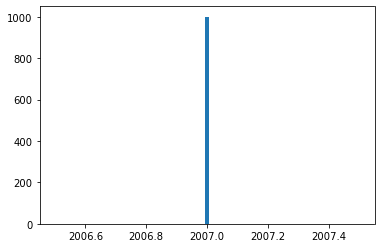

In [33]:
plt.hist(y_pred, bins=95)

How about an adaptive learning rate? By default, MLP-classifier uses a constant learning rate. To read more about learning rates visit: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [34]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1, learning_rate="adaptive")

clf.fit(training_examples, training_labels) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100, 100, 100),
              learning_rate='adaptive', random_state=1, solver='sgd')

In [35]:
y_pred = clf.predict(test_examples)

More of the same. More training data + an adaptive learning rate doesn't seem to work.

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([2006.5       , 2006.51052632, 2006.52105263, 2006.53157895,
        2006.54210526, 2006.55263158, 2006.56315789, 2006.57368421,
        2006.58421053, 2006.59473684, 2006.60526316, 2006.61578947,
        2006.62631579, 2006.63684211, 200

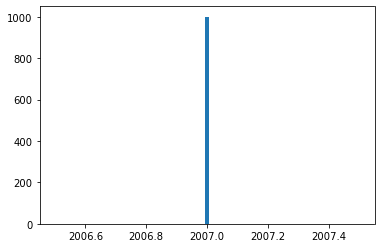

In [36]:
plt.hist(y_pred, bins = 95)

Let's observe the actual count of each class in the full dataset. These numbers confirm what the histograms told us-- most of the labels are for music from the late 90s and early 2000s. Even so, the data isn't so skewed that a neural net is completely ineffective... there is more to this story that we are not seeing yet.

In [37]:
label_counts = {}

for item in labels:
    if item not in label_counts:
        label_counts[item] = 1
    else:
        label_counts[item] += 1

In [38]:
label_counts

{2001: 21590,
 2007: 39404,
 2008: 34760,
 2002: 23451,
 2004: 29607,
 2003: 27382,
 1999: 18238,
 1992: 9543,
 1997: 15182,
 1987: 5122,
 2000: 19285,
 2005: 34952,
 1996: 14130,
 1998: 15814,
 2009: 31038,
 2006: 37534,
 1993: 10525,
 1991: 8647,
 1933: 6,
 1930: 40,
 1935: 24,
 1995: 13257,
 1941: 32,
 1990: 7256,
 1943: 14,
 1994: 12121,
 1974: 2184,
 1976: 2179,
 1975: 2482,
 1970: 2349,
 1971: 2131,
 1981: 3162,
 1989: 6670,
 1969: 2210,
 1972: 2288,
 1973: 2596,
 1983: 3386,
 2010: 9396,
 1985: 3578,
 1988: 5611,
 1979: 3108,
 1980: 3101,
 1986: 4219,
 1958: 583,
 1978: 2926,
 1968: 1867,
 1962: 605,
 1967: 1718,
 1982: 3597,
 1984: 3368,
 1961: 571,
 1966: 1377,
 1964: 945,
 1960: 424,
 1965: 1120,
 1963: 902,
 1977: 2502,
 1942: 24,
 1945: 30,
 1955: 275,
 1926: 19,
 1927: 42,
 1957: 597,
 1959: 592,
 1956: 565,
 1954: 123,
 1928: 52,
 1948: 43,
 1922: 6,
 1952: 77,
 1953: 133,
 1944: 15,
 1946: 29,
 1949: 60,
 1950: 83,
 1939: 35,
 1932: 11,
 1938: 19,
 1937: 28,
 1936: 25,
 

The above confirms our intuition that the dataset is biased towards music from the 90s and 2000s.

In [39]:
import math 

familiarity = []
hotttness = []
count = 0

# Replace filename with the path to the CSV where you have the year predictions data saved.
filename = "/mnt/c/Users/Aumit/Documents/GitHub/million-song-analysis/fam_vs_hot.csv"
with open(filename, 'r') as f:
    for line in f:
        if count == 0:
            count += 1
            continue
        else:
        
            content = line.split(",")

            # temp1 = float(content) 
            familiarity.append(float(content[0]))

            #content.pop(0)

            #content = [float(elem) for elem in content]

            # If we want a list of numpy arrays, not necessary
            #npa = np.asarray(content, dtype=np.float64)

            hotttness.append(float(content[1]))
        count += 1
print len(familiarity)
print len(hotttness)
for elem, elem1 in zip(familiarity, hotttness):
    if math.isnan(elem) or math.isnan(elem1):
        ind = familiarity.index(elem)
        ind1 = hotttness.index(elem1)
        del familiarity[ind]
        del hotttness [ind1]

print len(familiarity)
print len(hotttness)

#[value for value in familiarity if not math.isnan(value)]
#[value1 for value1 in hotttness if not math.isnan(value1)]
        
        
total_hotttness = np.array(hotttness)
total_familiarity = np.array(familiarity)



SyntaxError: invalid syntax (<ipython-input-39-10db750c53d9>, line 30)

In [ ]:
# fit with np.polyfit
m, b = np.polyfit(total_familiarity, total_hotttness, 1)

plt.plot(total_familiarity, total_hotttness, '.')
plt.xlabel("Familiarity")
plt.ylabel("Hotttness")
plt.title("Artist Familiarity vs. Artist Hotttness")
plt.plot(total_familiarity, m*total_familiarity + b, '-')
plt.yticks(np.arange(min(total_hotttness), max(total_hotttness), 0.4))

From the above, it's obvious that that there is a correlation between certain variables-- we can use this insight to perform better, more targetted feature extraction to increase the accuracy of our models. 